In [1]:
import sys
sys.path.insert(0,'../src/')

from utils import *
from multiply_connected_pipe import *

from matplotlib import pyplot as plt
import numpy as np
import pickle

In [2]:
with open('global_pipe_dense_solve.pickle','rb') as f:
    dense_solve = pickle.load(f)
with open('global_pipe_fmm_solve.pickle','rb') as f:
    fmm_solve = pickle.load(f)

In [3]:
b = dense_solve.boundary_value(0)
b = np.concatenate([b.real,b.imag])
omega_fmm = fmm_solve.omegas[0]
omega_fmm_sep = np.concatenate([omega_fmm.real,omega_fmm.imag])
omega_dense = dense_solve.omegas[0]
omega_dense_sep = np.concatenate([omega_dense.real,omega_dense.imag])

In [4]:
np.linalg.norm(omega_fmm-omega_dense)/np.linalg.norm(omega_dense)

2.9879306438547466e-10

In [5]:
dense_residual = (dense_solve.mat_vec(omega_dense_sep) - b)
fmm_residual = (fmm_solve.mat_vec(omega_fmm_sep) - b)

In [6]:
np.linalg.norm(dense_solve.mat_vec(omega_dense_sep) - fmm_solve.mat_vec(omega_dense_sep)) / np.linalg.norm(b)

2.7939226223692617e-12

In [7]:
np.linalg.norm(dense_residual) / np.linalg.norm(b)

8.836057940310945e-12

In [8]:
np.linalg.norm(fmm_residual) / np.linalg.norm(b)

4.6551999878504065e-12

In [9]:
np.linalg.norm(fmm_residual - dense_residual) / np.linalg.norm(b)

1.0438291914431395e-11

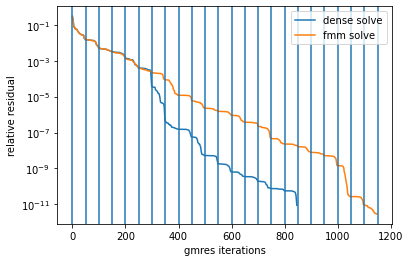

In [12]:
for callback in dense_solve.callbacks:
    plt.semilogy(np.arange(len(callback.residuals)), callback.residuals,label='dense solve')
    
for callback in fmm_solve.callbacks:
    plt.semilogy(np.arange(len(callback.residuals)), callback.residuals,label='fmm solve')


for i in np.arange(0,1200,RESTART):
    plt.axvline(i)
    
    
plt.legend()
plt.xlabel('gmres iterations')
plt.ylabel('relative residual')
print()